In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [77]:
# Laplacian matrix

Del2 = np.array([[0.05, 0.2, 0.05], [0.2, -1, 0.2], [0.05, 0.2, 0.05]])

In [78]:
# Parameters

# Diffusion rates
Da = 1.0
Db = 0.5

f = 0.014      # feed rate
k = 0.040      # kill rate

dt = 1.0       # Delta t between iterations
n = 100        # Total time between iterations

In [87]:
# Initializing grid with concentrations A and B

A = np.ones((500, 500))
B = np.zeros((500, 500))

In [88]:
def convolve(X, Y, Del2):
    
    X_conv = signal.convolve2d(X, Del2, mode='same')
    Y_conv = signal.convolve2d(Y, Del2, mode='same')
    
    return X_conv, Y_conv

In [89]:
def seeding(X, x_start, y_start, width, depth):
    
    x_end = x_start + width
    y_end = y_start + depth
    X[x_start:x_end, y_start:y_end] = 1
    
    return X

startx = 100
starty = 100
w = 50
d = 50
B_seed = seeding(B, startx, starty, w, d)

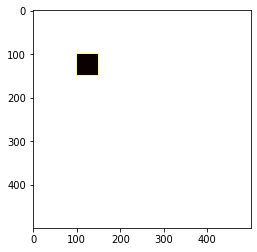

C:\Users\Drishika Nadella\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


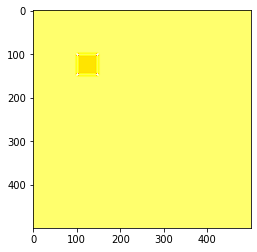

C:\Users\Drishika Nadella\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
C:\Users\Drishika Nadella\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
C:\Users\Drishika Nadella\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in add
  
C:\Users\Drishika Nadella\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in add
  import sys
C:\Users\Drishika Nadella\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in add
  del sys.path[0]


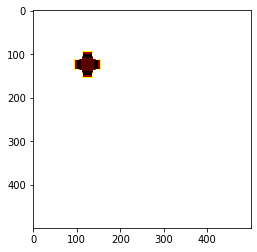

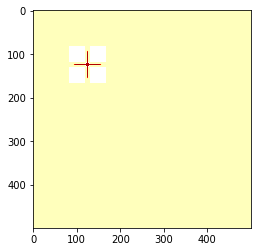

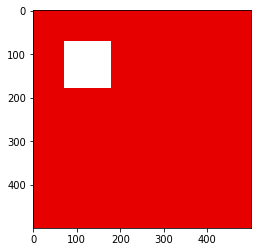

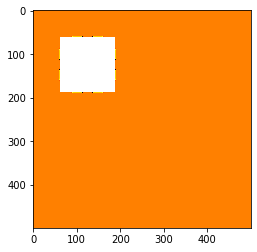

C:\Users\Drishika Nadella\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  
C:\Users\Drishika Nadella\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in multiply
  import sys


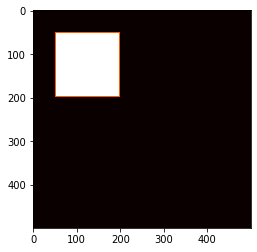

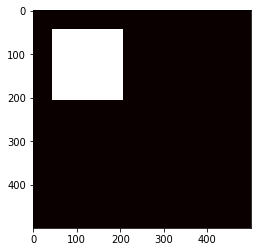

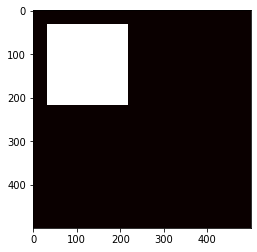

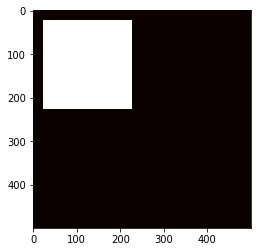

In [90]:
def reaction_diffusion(A, B):

        A_conv, B_conv = convolve(A, B, Del2)
        A_new = A + (Da*A_conv - A*B**2 + f*(1-A))*dt
        B_new= B + (Db*B_conv + A*B**2 - (k+f)*B)*dt
        A = A_new
        B = B_new

        if i%10 == 0:

            plt.imshow(A/(A + B), cmap='hot', interpolation='nearest')
            plt.show()
        
reaction_diffusion(A, B_seed)      